# Exploring raw data
This lab will continue our topic from this weeks class - exploring raw data.

Before you perform any analysis on *any* dataset, you should always take a look at the data in its "raw" form. This is crucial for a number of reasons. Looking at the data before you've done anything to it lets you:

1. Have a sanity check that it looks the way it should
2. Note any datapoints that seem like they're outliers
3. Find any sensors that are noisy or unreliable
4. Give a global-level view of what your dataset looks like

And a bunch of other stuff too.

# The dataset
In lecture we discussed Electroencephalography (EEG), in which electrodes are placed on a person's scalp in order to record electrical activity coming from the brain.

This lab will use a related (but different) dataset using a method called *electrocorticography*. This is a recording taken from the brain surface of a patient getting surgery for epilepsy.

Each sensor is an electrode placed on the "cortical surface" of the patient's brain. We are recording the electrical activity their brain produces as they sit in the Intensive Care Unit (ICU)

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import neurods as nds
%matplotlib inline

# 1 - Loading and simple plotting
First we'll use the datascience package to look at a few subsets of the data.

* Using the data path below, load the data into memory.
* Then, convert this object into a Table.

In [3]:
# The path to the new dataset can be found here:
# This is a dataset of electrocorticography (not EEG).
path_to_data = nds.io.data_list['ecog'] + 'ecog_sample/ecog_sample_full-raw.fif'

### STUDENT ANSWER
# This is a dataset of electrocorticography (not EEG).
raw = mne.io.Raw(path_to_data, preload=True)

Opening raw data file /home/shared/cogneuro-connector/data/ecog/ecog_sample/ecog_sample_full-raw.fif...
Isotrak not found
    Range : 0 ... 290000 =      0.000 ...   290.000 secs
Ready.
Reading 0 ... 290000  =      0.000 ...   290.000 secs...


First off, we'll use the `datascience` Table class to do some quick plotting. Because neuroscience data tends to be quite large, we're giving you a helper function to convert `Raw` objects into datascience tables (otherwise there's a good chance you'd explode the cluster memory!)

In [4]:
# Here's a helper function to convert MNE objects into Tables
raw_table = nds.mne_to_table(raw)  # Pass in the Raw object that you've loaded in the answer above.

* Now, convert this table into two others:
  * One with seconds 5-10
  * One with seconds 160-170.
* For each table, plot channels 4, 20, 40, and 60

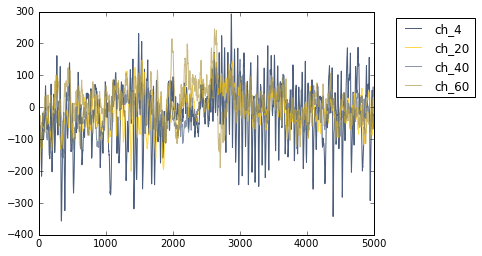

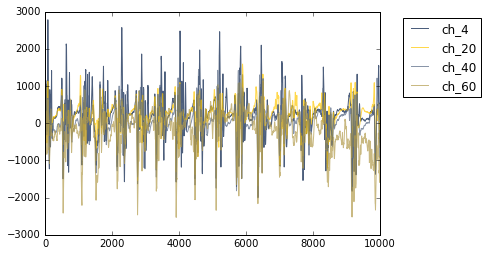

In [5]:
### STUDENT ANSWER
times = [(5, 10), (160, 170)]
chs = ['ch_4', 'ch_20', 'ch_40', 'ch_60']
for tmin, tmax in times:
    this_table = raw_table.where(
        (raw_table['time'] > tmin) * (raw_table['time'] < tmax))
    this_table = this_table.select(chs)
    this_table.plot()

* Now, try the same thing, but use the `time_mask` function in neurods.
  * You should read the docstring of this function to figure out how it works.
  * Note that in jupyter notebooks, you can type `function(` and hit `SHIFT+<TAB>`, and it will display the function's docstring.

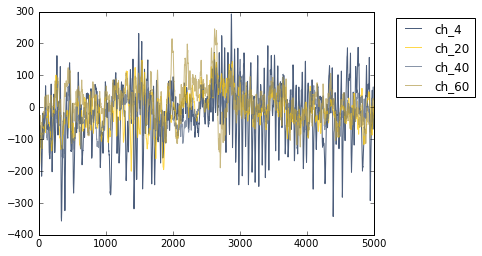

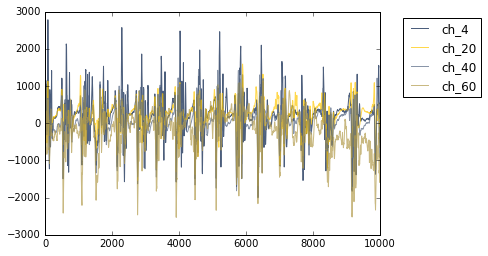

In [6]:
### STUDENT ANSWER
for tmin, tmax in times:
    mask = nds.time_mask(raw_table['time'], tmin, tmax)
    this_table = raw_table.where(mask)
    this_table = this_table.select(chs)
    this_table.plot()

### Questions
* Why do you see a difference between the two time windows? What do you think is going on?

In [ ]:
### STUDENT ANSWER
# The second plot above seems to be much "choppier" than the first. It's
# not immediately clear why this is, but perhaps there's some kind of
# "bursting" going on in the brain during the second time window.

## Stacking plot traces
It's a bit hard to see these traces because they're superimposed on one another.
* Make another plot (from 160-170 seconds), but this time iterate through channels, plotting each channel slightly above the one before it.

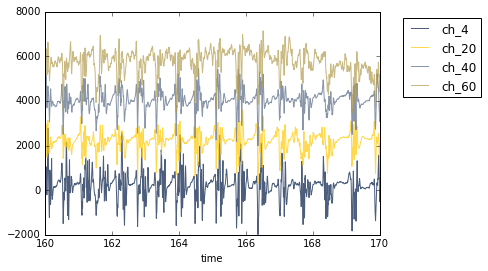

In [8]:
### STUDENT ANSWER
this_data = raw_table.where(nds.time_mask(raw_table['time'], 160, 170))
this_data = this_data.select(chs + ['time'])
for i, ch in enumerate(chs):
    offset = 2000 * i
    this_data[ch] = this_data[ch] + offset
this_data.plot('time')

# 2 - Interactively browsing with MNE
While it's important to be able to plot data on our own, MNE has a set of plotting libraries that make our lives much easier. Here we'll explore some very basic plotting functionality and take a look at our data more quickly.

* Using the `Raw` object that we initially loaded in, use the `plot` method to browse the data interactively.

In [ ]:
# We'll use the interactive notebook mode for this
%matplotlib notebook

# This sets the default figure size so it's a bit larger
nds.viz.set_figsize((10, 5))

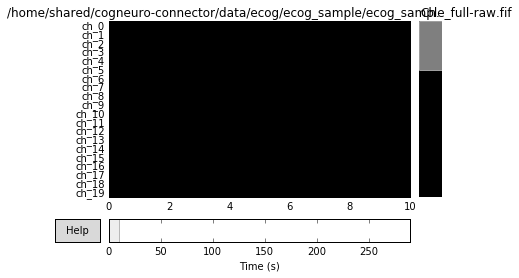

In [9]:
# If two plots show up, make sure you add a `_ = ` at the beginning of the line
### STUDENT ANSWER
_ = raw.plot()

* How does the above look, why do you think it looks that way?
* Try the same plot method, this time with an extra parameter: `scalings='auto'`

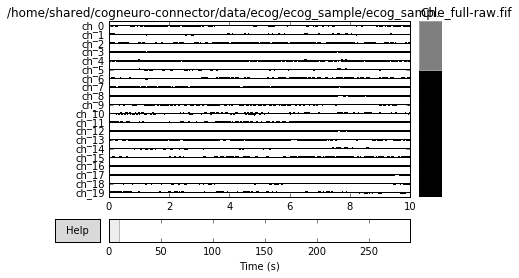

In [10]:
### STUDENT ANSWER
_ = raw.plot(scalings='auto')


That looks much better - what did you do by setting `scale='auto'`?

* Now, try to adjust the scale of the channels manually. You can do this by clicking `=` or `-` on the keyboard. Play around with this, and pick a scaling that you think works well.
* Scan through all of the timepoints, from beginning to end. You can do this with the arrow keys (left/right for timepoints, up/down for channels).
* Mark which channels seem to be noisy, put them in a list below.
* Mark time windows of interest, put them in a list as well.

In [ ]:
# STUDENT ANSWER
channels = []  # These will be variable for each person, but towards  the end some interesting stuff happens.
times = []

# Discussion questions (answer with one dot per question below)
* What do you think happens if a channel is particularly noisy?
* What effect would a particularly noisy set of timepoints have?
* How do you think ECoG differs from EEG?
* What's going on in this dataset?
* What would be useful information to have on top of this dataset? What would allow us to ask more interesting questions?

In [ ]:
### STUDENT ANSWER
# * If a channel is noisy, then we can't use it to understand what's going on in the brain.
#     Moreover, noise in channels occasionally spills over into others, and can mess up a
#     block of channls.
# * Noisy timepoints don't seem to affect other timepoints (except those nearby). If we
#   manually go in and remove (or mark as bad) timepoints that look noisy, we should be OK.
# * ECoG looks very similar to EEG (and in these plots there isn't a huge difference between
#   them). It is perhaps a little less noisy than EEG, and it has fewer electrodes. We'll see
#   more differences later on.
# * This dataset is a few minutes of recording from an epileptic patient that has a seizure.
#   You can see the seizure activity begin slowly, and then slowly ramp up. Eventually, all of
#   the channels in the grid are bursting strongly, and the person is in a full seizure state.
#   Then, everything quiets down and returns to normal.
# * It would be useful to know what the patient was doing before, during, and after the seizure.
#   For example, were they watching a screen or listening to sounds? It would also be good to know
#   the location of the electrodes, because then perhaps we could get a rough idea for where the
#   seizure was originating from.